# SDE solvers

In [11]:
from SDETestProblems import prey_predator_model, van_der_pol_model
import numpy as np
import matplotlib.pyplot as plt
from Solvers import StdWeinerProcess, SDEsolverExplicitExplicit

## Prey-predator

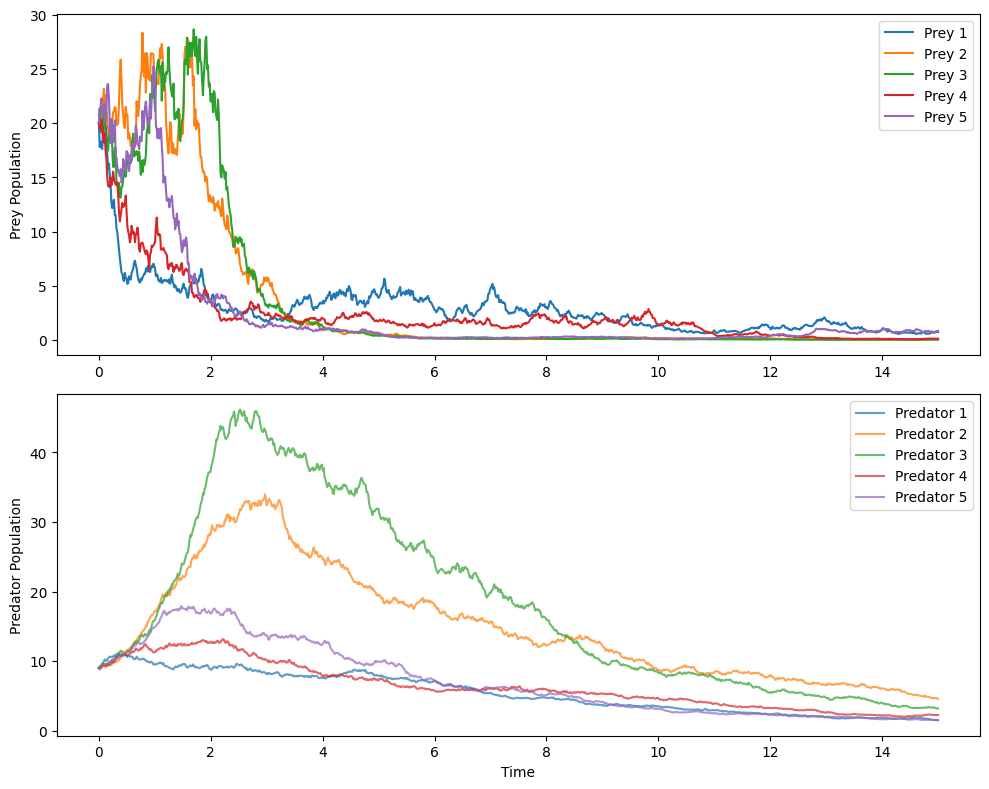

In [10]:
# Define time span and initial conditions
t_span = (0, 100)
x0 = np.array([20, 9])  # Example initial conditions for prey and predator populations
a = 0.2  # Prey growth rate
b = 0.04  # Predation rate



mu = 3
sigma = 1.0
p = np.array([mu, sigma])
tf = 5 * mu
nw = 2
N = 1000
Ns = 5
seed = 100

f, g, J = prey_predator_model(a, b, SDE = True, sigma_x = 0.5)

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((len(x0), N+1, Ns))

for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i], p)


# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
for i in range(Ns):
    ax1.plot(T, X[0, :, i], label=f'Prey {i+1}')
    ax2.plot(T, X[1, :, i], label=f'Predator {i+1}', alpha=0.7)

ax1.set_ylabel('Prey Population')
ax2.set_ylabel('Predator Population')
ax2.set_xlabel('Time')
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.show()

## Van der Pol

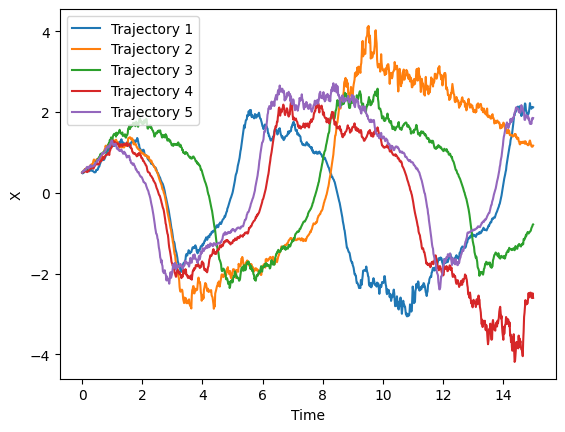

In [16]:
mu = 3
sigma = 1.0
x0 = np.array([0.5, 0.5])
p = np.array([mu, sigma])
tf = 5 * mu
nw = 2
N = 1000
Ns = 5
seed = 100

W, T, _ = StdWeinerProcess(tf, N, nw, Ns, seed)
X = np.zeros((len(x0), N+1, Ns))

f, g, Jac = van_der_pol_model(mu, SDE = True)

for i in range(Ns):
    X[:, :, i] = SDEsolverExplicitExplicit(f, g, T, x0, W[:, :, i], p)


#Plot the results
fig, ax = plt.subplots()
for i in range(Ns):
    ax.plot(T, X[0, :, i], label='Trajectory %d' % (i+1))
ax.set_xlabel('Time')
ax.set_ylabel('X')
ax.legend()
plt.show()